In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

# Домашнее задание

In [6]:
#1. Переменная names содержит в себе строку, где хранятся имена в формате 
# 'Name1 Surname1, Name2 Surname2, …'.
# Поместите в переменную names_list список со строками имён
# – ['Name1 Surname1', 'Name2 Surname2', …]
names = 'Name1 Surname1, Name2 Surname2, Name3 Surname3, Name4 Surname4, Name5 Surname5'  
names_list = names.split(', ')
names_list

['Name1 Surname1',
 'Name2 Surname2',
 'Name3 Surname3',
 'Name4 Surname4',
 'Name5 Surname5']

In [8]:
# 2. Отберите из них только те, где wealth принимает значение 'medium', 
# а возраст составляет больше 35.
# Поместите результат в переменную medium_35.

df = pd.DataFrame({'client_id' : [9002,6722,8799,8737,5208],
      'sex' : [1,1,1,0,0],
      'wealth' : ['medium','high','high','low','medium'],
      'age' : [63,64,62,54,32] })
df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,64
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,32


In [10]:
medium_35 = df.query('wealth == "medium" and age > 35')
# medium_35 = df.loc[(df.wealth == 'medium') & (df.age > 35)]
# в loc можно закидывать условия
medium_35

,client_id,sex,wealth,age
0,9002,1,medium,63


In [12]:
# 3. Добавьте в исследуемый нами датафрэйм df колонку older_than_30, 
# в которой будет информация превышает ли значение переменной возраста 
# 30 лет или нет (булево значение)
df['older_than_30'] = df.age > 30
df

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,64,True
2,8799,1,high,62,True
3,8737,0,low,54,True
4,5208,0,medium,32,True


In [14]:
# 4. А теперь получите серию с числом уникальных значений 
# для каждой колонки и присвойте её переменной unique_num.
unique_num = pd.Series(df.nunique())
unique_num

client_id        5
sex              2
wealth           3
age              5
older_than_30    1
dtype: int64

In [16]:
# 5. У нас появились новые данные! Переменная data хранит в себе датафрэйм 
# Проведите inner join датафрейма data с df из предыдущего шага, 
# объединив их по колонке client_id, 
# и поместите результат в переменную full_data 
data = pd.DataFrame({'client_id' : [9002,6722,8799,8737,5208],
      'amount' : [42331,88420,1714,80572,57549],
      'date' : [1585425830, 154834832, 3824842381, 382482221 , 348283222]})
full_data = df.merge(data, on = 'client_id')
full_data

,client_id,sex,wealth,age,older_than_30,amount,date
0,9002,1,medium,63,True,42331,1585425830
1,6722,1,high,64,True,88420,154834832
2,8799,1,high,62,True,1714,3824842381
3,8737,0,low,54,True,80572,382482221
4,5208,0,medium,32,True,57549,348283222


6. Вернемся к данным по поездкам на такси. На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей. <br>
Загрузите датасет, используя ; в качестве разделителя. <br>
Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).

In [22]:
taxi = pd.read_csv('data/3_taxi_peru.csv', parse_dates = ['start_at', 'end_at', 'arrived_at'], sep = ';')
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [24]:
# 7. Проверьте, с какой платформы было сделано больше всего заказов.
# В ответе укажите значение в %, округлённое до целого.
taxi.source.value_counts() / taxi.shape[0] * 100

source
iPhone     42.148760
web        33.018909
Android    21.240968
iPad        2.470685
Wap         0.588464
Name: count, dtype: float64

<Axes: xlabel='source', ylabel='count'>

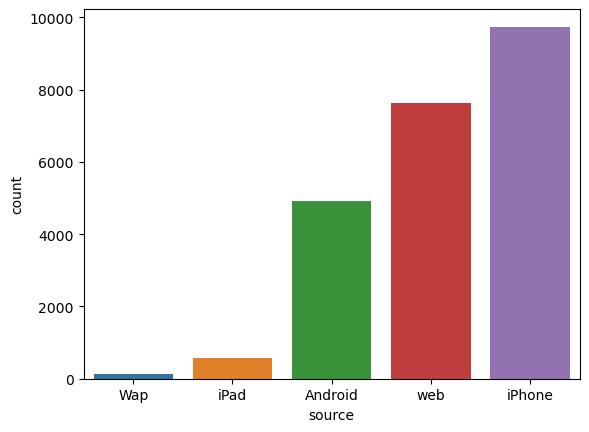

In [26]:
#  8. Агрегируйте данные и постройте барчарт, где по оси x будет 
# расположено название платформы (source), 
# а по оси y – количество заказов (абсолютные значения).
taxi_sources = taxi.groupby('source', as_index = False).agg({'user_id' : 'count'}) \
                .rename(columns={'user_id' : 'count'}) \
                .sort_values('count')
sns.barplot(data = taxi_sources, x = taxi_sources.source, y = "count")

<Axes: xlabel='icon', ylabel='count'>

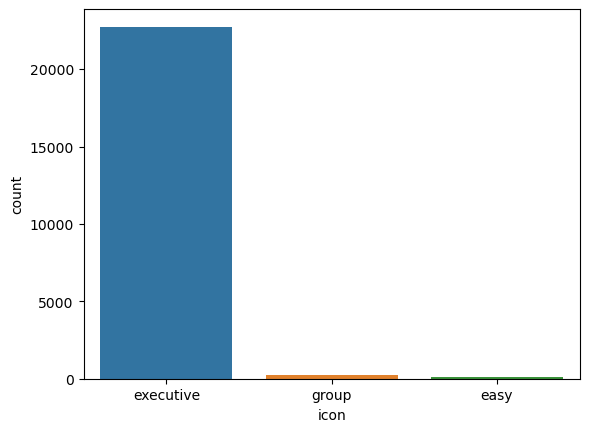

In [28]:
#  9. Альтернативный вариант построения распределения категориальной переменной 
# – sns.countplot. В качестве единственного аргумента можно передать 
# всего одну колонку: например, 
# source, а количество значений для оси y функция посчитает самостоятельно.
# sns.countplot(taxi['source'])
# Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего.
sns.countplot(x = taxi['icon'])

<Axes: xlabel='source', ylabel='count'>

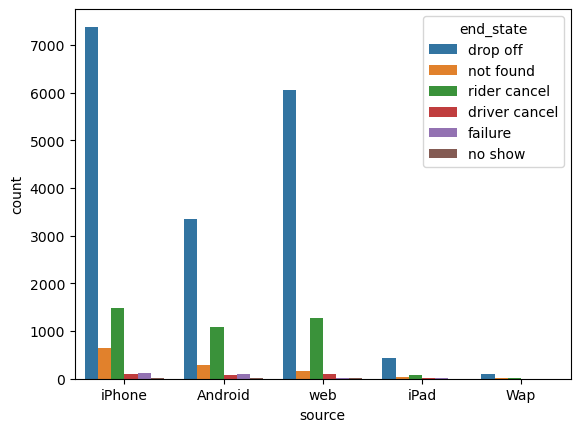

In [30]:
# 10. С помощью sns.countplot и параметра hue визуализируйте распределение 
# переменной end_state 
# (итоговое состояние заказа) в разбивке по платформам (source).
sns.countplot(x = taxi.source, hue = taxi.end_state)

In [32]:
#  11. Проверим, как распределены оценки водителей (driver_score). 
drivers_score = (taxi.driver_score.value_counts() / len(taxi)) \
                .mul(100).round(2).reset_index() \
                .rename(columns = {'count' : 'percentage'}) \
                .sort_values('driver_score')
drivers_score

,driver_score,percentage
2,0.0,4.73
4,1.0,0.41
5,2.0,0.27
3,3.0,0.98
1,4.0,7.24
0,5.0,19.47


<Axes: xlabel='driver_score', ylabel='percentage'>

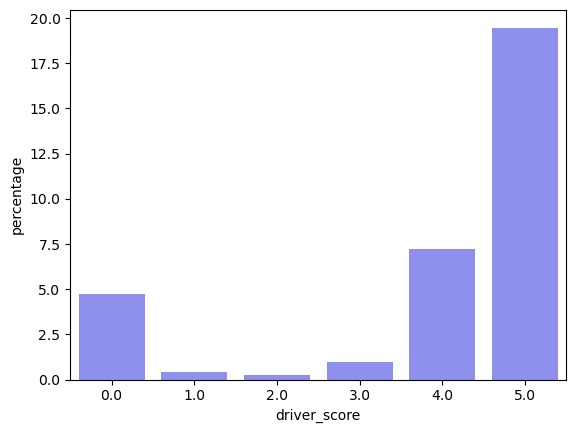

In [34]:
# 12. Строим барплот на основе drivers_score
sns.barplot(data = drivers_score, x = 'driver_score' , y = 'percentage', color = 'blue', alpha = 0.5)

In [36]:
# 13. Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), 
# не забыв построить график.
# В чем его отличие от распределения оценок водителей?
users_score = (taxi.rider_score.value_counts() / len(taxi)) \
                .mul(100).round(2).reset_index() \
                .rename(columns = {'count' : 'percentage'}) \
                .sort_values('rider_score')
users_score

,rider_score,percentage
2,0.0,1.52
4,1.0,0.14
5,2.0,0.13
3,3.0,0.92
1,4.0,5.88
0,5.0,58.00


<Axes: xlabel='rider_score', ylabel='percentage'>

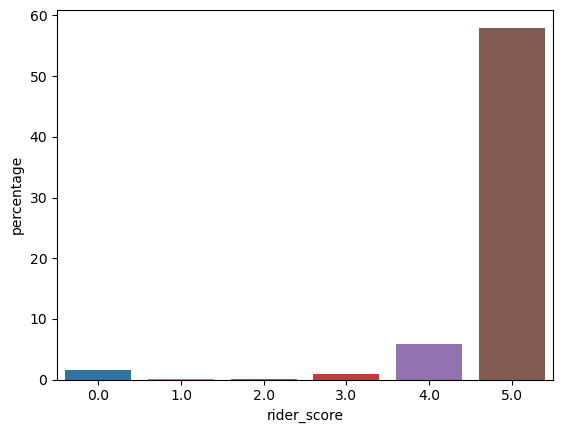

In [38]:
sns.barplot(data = users_score, x = 'rider_score' , y = 'percentage')

# Минипроект

### Задачи
1.	Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику. <br>
2.	Какой клиент совершил больше всего успешных операций? (success == True) <br>
3.	С какой платформы осуществляется наибольшее количество успешных операций? <br>
4.	Какую платформу предпочитают премиумные клиенты? <br>
5.	Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет) <br>
6.	Постройте график распределения числа успешных операций <br>
7.	Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?йствий?


### Описание данных
user_data: <br>
•	client – идентификатор пользователя <br>
•	premium – является ли клиент премиум <br>
•	age – возраст <br>
logs: <br>
•	client – идентификатор пользователя <br>
•	success – результат (успех - 1, нет - 0) <br>
•	platform – платформа <br> 
•	time – время в формате Unix<br>

In [48]:
logs = pd.read_csv("data/3_logs.csv")
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [50]:
user_data = pd.read_csv("data/3_user_data.csv")
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


## Описание данных

In [53]:
# Размер таблицы
logs.shape

(4500, 4)

In [55]:
# Типы данных
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [57]:
# Описательная статистика
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [59]:
# Пропущенные значения
logs.isnull().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [61]:
user_data.shape

(2954, 3)

In [63]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [65]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [67]:
user_data.isnull().sum()

client     0
premium    0
age        0
dtype: int64

In [69]:
# 2. Сколько уникальных значений принимает переменная platform?
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [73]:
# 3. Какой клиент совершил больше всего успешных операций?
max_count_idx = logs.loc[logs.success == 1].client.value_counts().idxmax()
max_count = len(logs.loc[logs.client == max_count_idx])
logs.loc[logs.success == 1].client.value_counts().reset_index().query(f'count == {max_count}')

,client,count
0,28719,41
1,52870,41
2,61468,41
3,61473,41
4,12179,41
5,82563,41
6,36165,41
7,92584,41
8,78349,41


In [75]:
# 4. С какой платформы осуществляется наибольшее количество успешных операций?
success_platform = logs.loc[logs.success == 1].platform.value_counts()
success_platform

platform
phone       2019
computer    1090
tablet       180
Name: count, dtype: int64

In [77]:
# 5. Какая платформа наиболее популярна среди премиумных клиентов?
users_logs = user_data.merge(logs, on = 'client')
users_logs

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [79]:
# Теперь у премиумных клиентов посмотрим количество операций с платформ
users_logs.loc[users_logs.premium == True].platform.value_counts()

platform
phone       246
computer    150
tablet       24
Name: count, dtype: int64

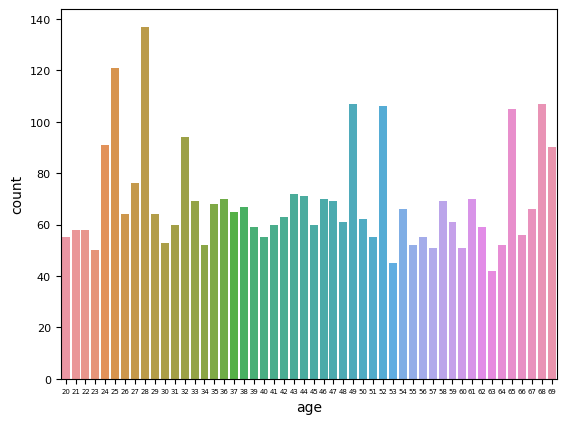

In [81]:
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=8)
ax = sns.countplot(x = users_logs.age)

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


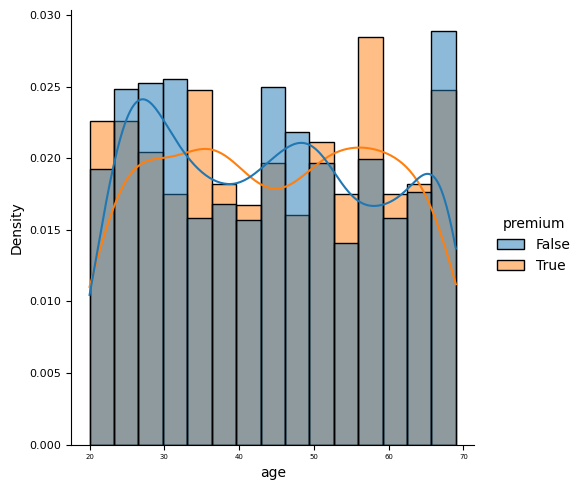

In [83]:
# 6. Визуализируйте распределение возраста клиентов в зависимости от типа клиента 
# (обычный или премиум), 
# используя библиотеку seaborn с параметрами цвета по умолчанию. 
sns.displot(users_logs, x = 'age', hue = 'premium', kind = 'hist',
           kde = True, stat = 'density', common_norm = False)

In [87]:
# 7. Постройте график распределения числа успешных операций: 
#•	x – число успешных операций
#•	y – число клиентов, совершивших столько успешных операций

count_success = logs.loc[logs.success == 1].client.value_counts().reset_index()
count_success.head()

,client,count
0,28719,41
1,52870,41
2,61468,41
3,61473,41
4,12179,41


Text(0, 0.5, 'count success operations')

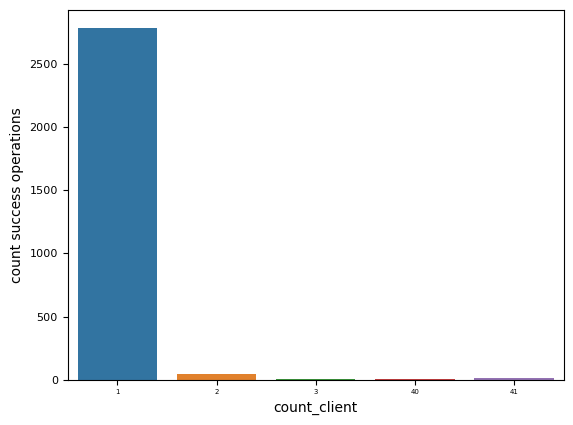

In [89]:
sns.countplot(x = count_success['count'])
plt.xlabel("count_client")
plt.ylabel("count success operations")

In [91]:
# 8. Визуализируйте число успешных операций, сделанных на платформе computer, 
# в зависимости от возраста, используя sns.countplot. 
# По оси x – возраст, y – число успешных операций
age_success = users_logs.loc[(users_logs.success == 1) & (users_logs.platform == 'computer')].groupby('age', as_index = False) \
                                                                                .agg({'success' : 'count'}) \
                                                                                .rename(columns = {'success' : 'count_success'}) \
                                                                                .sort_values('count_success', ascending = False)
age_success.head()

,age,count_success
8,28,49
29,49,33
5,25,33
12,32,27
48,68,26


<Figure size 1200x800 with 0 Axes>

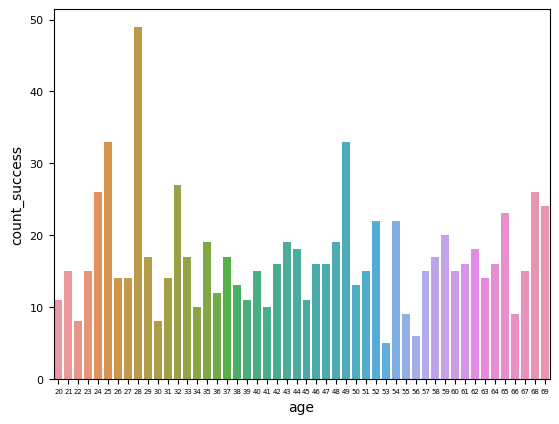

<Figure size 1200x800 with 0 Axes>

In [93]:
sns.barplot(x = age_success.age, y = age_success.count_success)
plt.figure(figsize = (12,8))